In [1]:
from docembedder import CountVecEmbedder, TfidfEmbedder
from docembedder.preprocessor.parser import read_xz
from docembedder.analysis import classification_benchmark
from docembedder.preprocessor.preprocessor import Preprocessor
from docembedder.preprocessor.oldprep import OldPreprocessor
from matplotlib import pyplot as plt
from tqdm import tqdm
import logging
from collections import defaultdict

In [2]:
models = {
    "tfidf": TfidfEmbedder(),
    "count-sigmoid": CountVecEmbedder("sigmoid"),
    "count-prop": CountVecEmbedder("prop"),
}

In [3]:
preprocessors = {
    "new": Preprocessor(log_level=logging.ERROR),
    "old": OldPreprocessor()
}

...read 32418 stopwords...


[nltk_data] Downloading package stopwords to /home/qubix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
results = defaultdict(lambda: [])
all_years = []
for prep_name, prep in preprocessors.items():
    for year in tqdm(range(1880, 1920)):
        patents, _ = prep.preprocess_file(f"../data/unprocessed/{year}.xz")
        documents = [pat["contents"] for pat in patents]
        res = classification_benchmark(patents, models, n_patents=1000, n_class_sample=20000)
        for model_name, r in res.items():
            results[model_name + "-" + prep_name].append(r)
        
        if prep_name == "old":
            all_years.append(year)
    

  0%|                                                                  | 0/40 [00:00<?, ?it/s]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
  2%|█▍                                                        | 1/40 [01:09<45:29, 69.97s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
  5%|██▉                                                       | 2/40 [02:35<50:07, 79.15s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
  8%|████▎                                                     | 3/40 [04:14<54:18, 88.08s/it]/home/qubix/Documents/shared_work/patents/patent-breakthr

 72%|███████████████████████████████████████▏              | 29/40 [1:21:08<46:10, 251.83s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 75%|████████████████████████████████████████▌             | 30/40 [1:26:07<44:18, 265.88s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 78%|█████████████████████████████████████████▊            | 31/40 [1:30:58<40:59, 273.32s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 80%|███████████████████████████████████████████▏          | 32/40 [1:35:33<36:30, 273.86s/it]/home/qubix/Documents/shared_work/patents/patent-breakthr

 45%|████████████████████████▎                             | 18/40 [45:58<1:06:55, 182.51s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 48%|█████████████████████████▋                            | 19/40 [48:59<1:03:37, 181.77s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 50%|███████████████████████████                           | 20/40 [52:32<1:03:44, 191.23s/it]/home/qubix/Documents/shared_work/patents/patent-breakthrough/docembedder/countvec.py:27: RuntimeWarning: overflow encountered in exp
  weights = 1 - (1 / (1 + np.exp(-c1 * (freqs - c2))))
 52%|████████████████████████████▎                         | 21/40 [56:18<1:03:50, 201.61s/it]/home/qubix/Documents/shared_work/patents/patent-breakthr

In [9]:
print(all_years)

[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919]


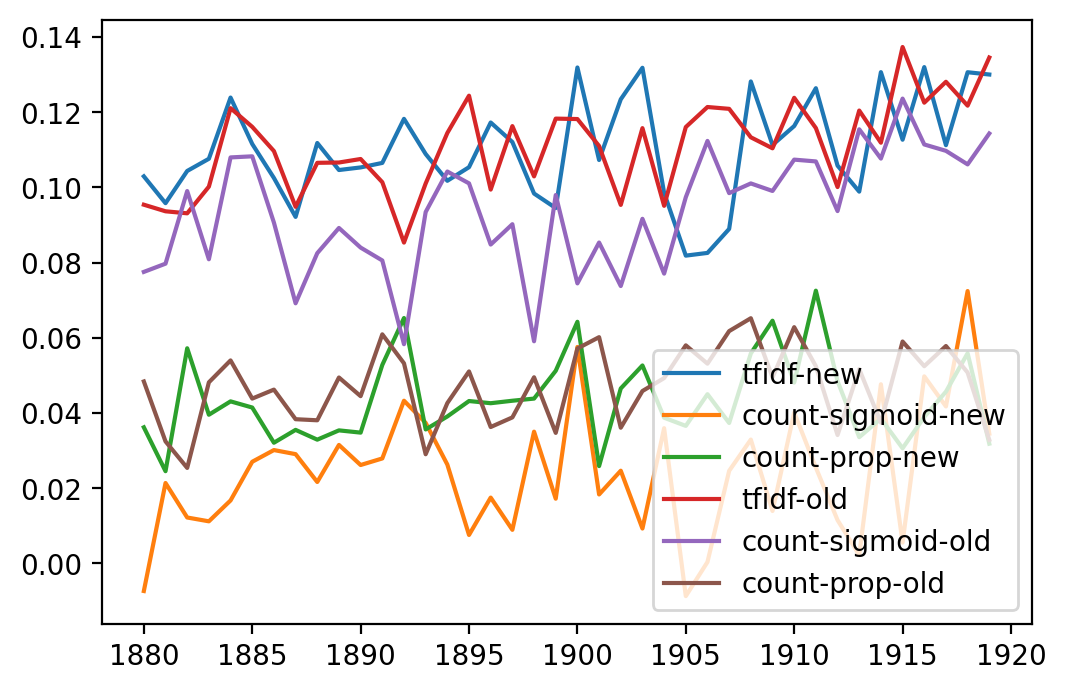

In [12]:
plt.figure(dpi=200)
for model_name, res in results.items():
    plt.plot(all_years, res, label=model_name)
plt.legend()
plt.show()

In [14]:
import numpy as np
{name: np.mean(res) for name, res in results.items()}

{'tfidf-new': 0.11012831000758812,
 'count-sigmoid-new': 0.024518652735894424,
 'count-prop-new': 0.04352324433816669,
 'tfidf-old': 0.11102988261049174,
 'count-sigmoid-old': 0.09362300795082593,
 'count-prop-old': 0.04730624205406624}